## `19IT031 Aman Desai`

## Practical - 8 `SVM for Classification`

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

### LOADING DATA

In [3]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


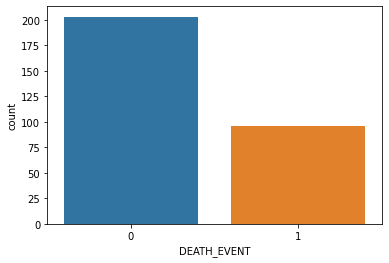

In [5]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
sns.countplot(x= data["DEATH_EVENT"])

Here we can observe imbalance in data

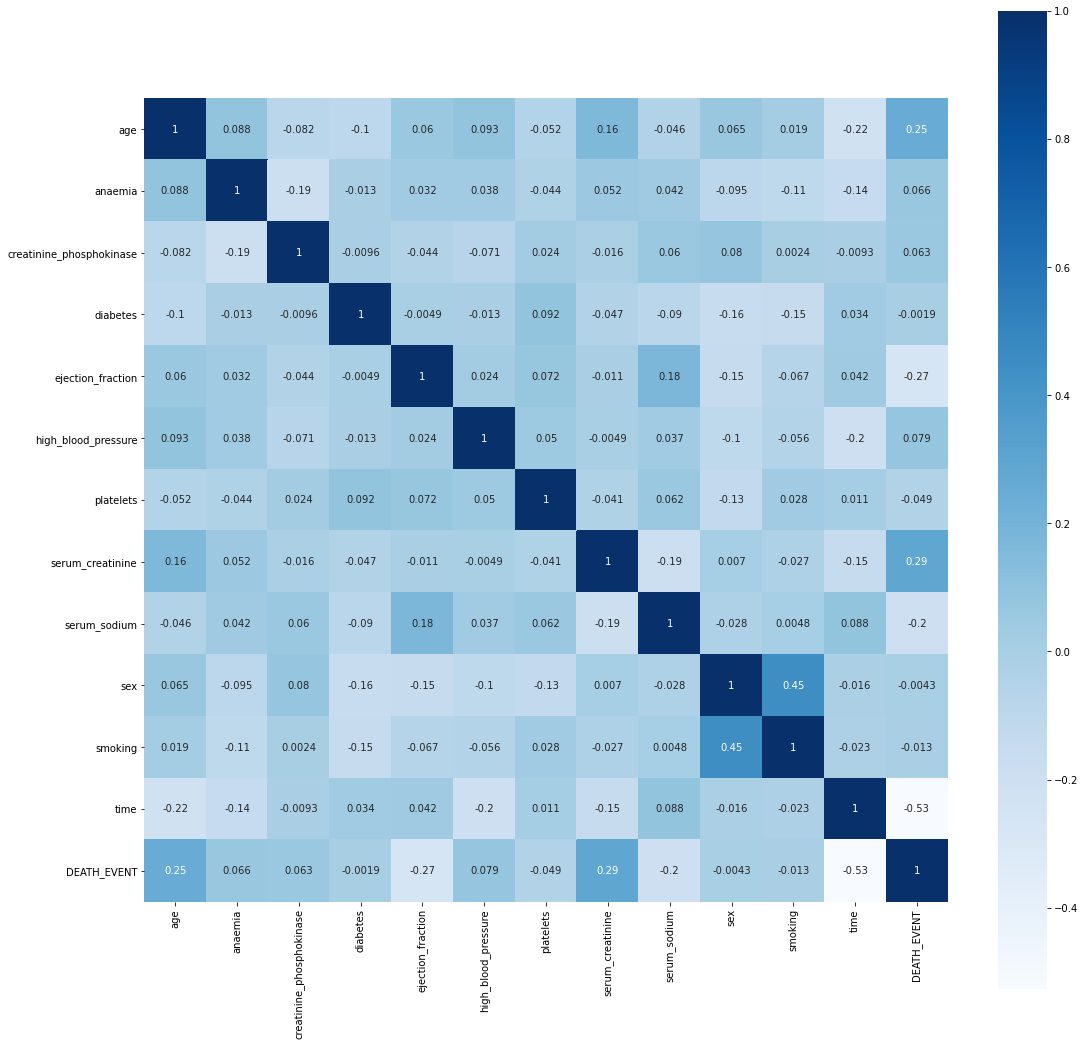

In [9]:
#Examaning a corelation matrix of all the features 
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Blues",annot=True, square=True);

In [12]:
data.describe().T

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### DATA PREPROCESSING

In [13]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [14]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [30]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=7)

In [31]:
# basic method
clf = SVC() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8778
SVC f1-score  : 0.7556
SVC precision : 0.6800
SVC recall    : 0.8500

               precision    recall  f1-score   support

           0       0.95      0.89      0.92        70
           1       0.68      0.85      0.76        20

    accuracy                           0.88        90
   macro avg       0.82      0.87      0.84        90
weighted avg       0.89      0.88      0.88        90



In [32]:
# basic method
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8222
SVC f1-score  : 0.6667
SVC precision : 0.6400
SVC recall    : 0.6957

               precision    recall  f1-score   support

           0       0.89      0.87      0.88        67
           1       0.64      0.70      0.67        23

    accuracy                           0.82        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.83      0.82      0.82        90



In [33]:
# basic method
clf1 = SVC(kernel='rbf') 
clf1.fit(X_train, y_train) 

y_pred = clf1.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8778
SVC f1-score  : 0.7556
SVC precision : 0.6800
SVC recall    : 0.8500

               precision    recall  f1-score   support

           0       0.95      0.89      0.92        70
           1       0.68      0.85      0.76        20

    accuracy                           0.88        90
   macro avg       0.82      0.87      0.84        90
weighted avg       0.89      0.88      0.88        90



In [34]:
# basic method
clf = SVC(kernel='poly') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8222
SVC f1-score  : 0.5294
SVC precision : 0.3600
SVC recall    : 1.0000

               precision    recall  f1-score   support

           0       1.00      0.80      0.89        81
           1       0.36      1.00      0.53         9

    accuracy                           0.82        90
   macro avg       0.68      0.90      0.71        90
weighted avg       0.94      0.82      0.85        90



In [35]:
# basic method
clf = SVC(kernel='sigmoid') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8778
SVC f1-score  : 0.7556
SVC precision : 0.6800
SVC recall    : 0.8500

               precision    recall  f1-score   support

           0       0.95      0.89      0.92        70
           1       0.68      0.85      0.76        20

    accuracy                           0.88        90
   macro avg       0.82      0.87      0.84        90
weighted avg       0.89      0.88      0.88        90



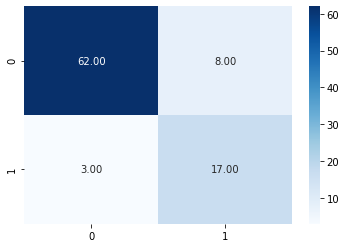

In [36]:
y_pred = clf1.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")

## Conclusion:

* By performing i learned, what is SVM and how to implement it. 


* SVM is a supervised learning algorithm which separates the data into different classes
through the use of a hyperplane. The chosen hyperplane is one with the greatest margin
between the hyperplane and all points, this yields the greatest likelihood of accurate
classification